# Initialization

In [145]:
import numpy as np
from matplotlib import pyplot as plt

# for p-value out of significance test
from scipy.stats import ttest_ind

In [2]:
dataFolder = "./data"
p1 = { "testDir": dataFolder + "/p1_test.csv", "trainDir": dataFolder + "/p1_train.csv" }
p2 = { "testDir": dataFolder + "/p2_test.csv", "trainDir": dataFolder + "/p2_train.csv" }
p3 = { "testDir": dataFolder + "/p3_test.csv", "trainDir": dataFolder + "/p3_train.csv" }

p1["test"] = np.genfromtxt(p1["testDir"], delimiter=',')
p1["train"] = np.genfromtxt(p1["trainDir"], delimiter=',')
p2["test"] = np.genfromtxt(p2["testDir"], delimiter=',')
p2["train"] = np.genfromtxt(p2["trainDir"], delimiter=',')
p3["test"] = np.genfromtxt(p3["testDir"], delimiter=',')
p3["train"] = np.genfromtxt(p3["trainDir"], delimiter=',')

# Custom functions for P1 and P2

In [50]:
# Compute mean squared error
def mse(X, Y, W):
    return (1/2) * (X @ W - Y) @ (X @ W - Y)

# Compute mean absolute error
def mae(X, Y, W):
    return np.sum(np.abs(X @ W - Y))

# Normalize a vector
def normalize(v):
    min = v.min()
    max = v.max()
    return (v - min) / (max - min)

# Standardize a vector
def standardize(v):
    mean = np.mean(v)
    std = np.std(v)
    return (v - mean) / std

# Normalize and split the training data into features matrix with bias and the result vector
def parseData(data):
    m, n = data.shape
    data = np.array([normalize(col) for col in data.T]).T
    X = np.c_[np.ones(m), data.T[:-1].T]
    Y = data.T[-1].T
    return X, Y

# Print the required metrics
def printResult(x_train, y_train, x_test, y_test, func = lambda x : x):
    x_train = func(x_train)
    x_test = func(x_test)
    
    m, n = x_train.shape
    w = np.linalg.pinv(x_train) @ y_train

    print("MSE (train-split)     : ", mse(x_train, y_train, w))
    print("MAE (train-split)     : ", mae(x_train, y_train, w))
    print("p-value (train-split) : ", ttest_ind(x_train @ w, y_train).pvalue)

    print("--------------------------------------")

    print("a) MSE     : ", mse(x_test, y_test, w))
    print("b) MAE     : ", mae(x_test, y_test, w))
    print("c) p-value : ", ttest_ind(x_test @ w, y_test).pvalue)

# P1 (Regression Analysis)

In this problem, the task is to predict the current health (as given by the target variable) of an organism given the measurements from two biological sensors measuring their bio-markers (negative indicates that it is lesser than the average case). 

With this data, you are expected to try our linear regression models on the  training data and report the following metrics on the test split: 
- Mean Squared Error, 
- Mean Absolute Error, 
- p-value out of significance test.

**DATA:** `p1train/test.csv`

In [4]:
p1["train"].shape

(10000, 3)

In [5]:
X, Y = parseData(p1["train"])
X_test, Y_test = parseData(p1["test"])

# Initialise the parameters to be a null vector
W = np.array([0, 0, 0])

X, Y, W
# Check metrics with parameters as null vector
print(mse(X, Y, W))
print(mae(X, Y, W))

1476.0901088253356
5019.547076086856


## Linear regression
$h(x) = w_0 + w_1x_1 + w_2x_2$

In [6]:
printResult(X, Y, X_test, Y_test)

MSE (train-split)     :  1.6377431789576247
MAE (train-split)     :  144.16318383122172
p-value (train-split) :  0.9999999999998793
--------------------------------------
a) MSE     :  1.0198792104638341
b) MAE     :  81.01047477588321
c) p-value :  0.030717508773848688


# P2 (Regression Analysis)

Here, you are expected to predict the lifespan of the above organism given the data from three sensors. In this case, the model is not linear.

You are expected to try several (at least 3) non-linear regression models on the train split and report the following metrics on the test split.
- Mean Squared Error
- Mean Absolute Error
- p-value out of significance test

**DATA**: `p2train/test.csv`

In [74]:
p2["train"].shape, p2["test"].shape

((10000, 4), (5000, 4))

In [8]:
X, Y = parseData(p2["train"])
X_test, Y_test = parseData(p2["test"])

# Initialise the parameters to be a null vector
W = np.array([0, 0, 0, 0])

# Check metrics with parameters as null vector
print(mse(X, Y, W))
print(mae(X, Y, W))

93.14053909693217
729.3773208010364


## Linear regression
$h(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$

In [9]:
printResult(X, Y, X_test, Y_test)

MSE (train-split)     :  64.04261865353428
MAE (train-split)     :  792.8424805196497
p-value (train-split) :  1.0
--------------------------------------
a) MSE     :  34.45351730675273
b) MAE     :  402.40621699350675
c) p-value :  0.04567218862928123


## Non-Linear regression (1)
$h_1(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_1x_2 + w_5x_2x_3 + w_6x_3x_1 + w_7x_1^2 + w_8x_2^2 + w_9x_3^2$

In [10]:
def makeQuadratic(data):
    n = data.shape[1]
    return np.array([data.T[i] * data.T[j] for i in range(n) for j in range(n) if j <= i]).T

printResult(X, Y, X_test, Y_test, makeQuadratic)

MSE (train-split)     :  15.025195918707364
MAE (train-split)     :  414.43543405251074
p-value (train-split) :  0.9999999999995892
--------------------------------------
a) MSE     :  8.293925461081386
b) MAE     :  214.73836188569697
c) p-value :  0.6539657025513983


## Non-Linear regression (2)
$h_2(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$
     $+ w_4x_1x_2 + w_5x_2x_3 + w_6x_3x_1 + w_7x_1^2 + w_8x_2^2 + w_9x_3^2$
     $+ w_{10}x_1x_2x_3 + w_{11}x_1^2x_2 + w_{12}x_2^2x_1 + w_{13}x_2^2x_3 + w_{14}x_3^2x_2 + w_{15}x_3^2x_1 + w_{16}x_1^2x_3 + w_{17}x_1^3 + w_{18}x_2^3 + w_{19}x_3^3$

In [11]:
def makeCubic(data):
    n = data.shape[1]
    return np.array([data.T[i] * data.T[j] * data.T[k] for i in range(n) for j in range(n) for k in range(n) if j <= i and k <= j]).T

printResult(X, Y, X_test, Y_test, makeCubic)

MSE (train-split)     :  14.015061295947277
MAE (train-split)     :  403.4520118357519
p-value (train-split) :  0.9999999999999714
--------------------------------------
a) MSE     :  7.792580568256314
b) MAE     :  210.3268643472337
c) p-value :  0.6337887955340187


## Non-Linear regression (3)
$h_3(x) = h_1(h_1(x))$

In [12]:
printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeQuadratic(x)))

MSE (train-split)     :  0.8243996952040266
MAE (train-split)     :  97.24998340500956
p-value (train-split) :  0.9999999999995098
--------------------------------------
a) MSE     :  0.47367918630981265
b) MAE     :  48.4986710732787
c) p-value :  0.44918301185120135


## Non-Linear regression (4)
$h_4(x) = h_1(h_2(x))$

In [13]:
printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeCubic(x)))

MSE (train-split)     :  0.016265667882183227
MAE (train-split)     :  10.770107850314911
p-value (train-split) :  0.999999999986867
--------------------------------------
a) MSE     :  0.03926868382605306
b) MAE     :  10.629900379280002
c) p-value :  0.42898862281953176


## Non-Linear regression (5)
$h_3(x) = h_2(h_2(x))$

In [14]:
printResult(X, Y, X_test, Y_test, lambda x : makeCubic(makeCubic(x)))

MSE (train-split)     :  0.015762615029126598
MAE (train-split)     :  10.675718560412275
p-value (train-split) :  0.9999999999146658
--------------------------------------
a) MSE     :  0.03979982849860955
b) MAE     :  10.671505405575594
c) p-value :  0.4293311009552302


## Non-Linear regression (6)
$h_3(x) = h_1(h_1(h_1(x)))$

In [15]:
printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeQuadratic(makeQuadratic(x))))

MSE (train-split)     :  0.015956425766832035
MAE (train-split)     :  10.69491349283181
p-value (train-split) :  0.999999999841779
--------------------------------------
a) MSE     :  0.039514123289274505
b) MAE     :  10.641599853358713
c) p-value :  0.42992684854076213


## Non-Linear regression (7)
$h_3(x) = h_1(h_1((h_2(x)))$

In [16]:
# printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeQuadratic(makeCubic(x))))

## Non-Linear regression (8)
$h_3(x) = h_1(h_2(h_2(x)))$

In [17]:
# printResult(X, Y, X_test, Y_test, lambda x : makeQuadratic(makeCubic(makeCubic(x))))

## Non-Linear regression (9)
$h_3(x) = h_2(h_2(h_2(x)))$

In [18]:
# printResult(X, Y, X_test, Y_test, lambda x : makeCubic(makeCubic(makeCubic(x))))

# Custom functions for P3, P4 and P5

In [144]:
np.log(10)

2.302585092994046

In [176]:
def logNormal(x, mean, cov):
    return - 0.5 * (np.log(np.linalg.det(cov)) + ((x - mean) @ np.linalg.inv(cov) @ (x - mean)))

# assume independent features
def logExp(x, mean, _):
    # ignore features with negative mean
    # for i in range(mean.size):
    #     if x[i] <= 0:
    #         np.delete(mean, i)
    #         np.delete(x, i)
    # print("Mean: ", mean)
    return np.log(np.abs(np.prod(mean))) - np.reciprocal(mean) @ x

def classify(x, classStats, func):
    label = '0.0'
    max = -99999
    for key in classStats:
        mean = classStats[key]["mean"]
        cov = classStats[key]["cov"]
        prior = classStats[key]["prior"]
        val = np.log(prior) + func(x, mean, cov)
        if val > max:
            max, label = val, key
    return label
    
class metrics:
    def accuracy(predicted, actual):
        m = actual.size
        correctCount = sum([1 if int(float(predicted[i])) == int(actual[i]) else 0 for i in range(m)])
        return correctCount / m
    
    def confusionMatrix(predicted, actual):
        n = 5
        cnf = np.zeros((5, 5), dtype='uint')
        for i in range(actual.size):
            cnf[int(actual[i]) - 1][int(float(predicted[i])) - 1] += 1
        return cnf
    
    # precision = TP/(TP + FP), recall = TP/(TP + FN), 
    # f1 = 2 * precision * recall / (precision + recall)
    def f1Score(cnf):
        sum_predict = np.sum(cnf, axis=0)
        sum_actual  = np.sum(cnf, axis=1)
        f1 = np.zeros(cnf.shape[1])
        for i in range(f1.size):
            TP = cnf[i][i]
            FP, FN = sum_predict[i] - TP, sum_actual[i] - TP
            p, r = TP/(TP + FP), TP/(TP + FN)
            f1[i] = 2 * p * r / (p + r)
        return f1
    
    def print(X, Y, classStats, density):
        predict = np.array([classify(x, classStats, density) for x in X])
        actual = Y
        
        cnf = metrics.confusionMatrix(predict, actual)
        print("Classification Accuracy : ", metrics.accuracy(predict, actual))
        print("F1 Score                : ", metrics.f1Score(cnf))
        print("Confusion Matrix        : ")
        plt.matshow(cnf)

# P3 (Multi-class classification)

We have data from 10 sensors fitted in an industrial plant. There are five classes indicating which product is being produced. The task is to predict the product being produced by looking at the observation from these 10 sensors. 

Given this, you are expected to implement 
- Bayes’ classifiers with 0-1 loss assuming Normal, exponential, and GMMs (with diagonal co-variances) as class-conditional densities. For GMMs, code up the EM algorithm,
- Linear classifier using the one-vs-rest approach
- Multi-class Logistic regressor with gradient descent.

The metrics to be computed are 
- Classification accuracy, 
- Confusion matrix,
- Class-wise F1 score, 
- RoC curves for any pair of classes, and 
- likelihood curve for EM with different choices for the number of mixtures as hyper-parameters, 
- Emipiral risk on the train and test data while using logistic regressor.

**DATA:** `p3train/test.csv`

In [79]:
p3["train"].shape, p3["test"].shape

((60000, 11), (15000, 11))

In [72]:
classes = {}
for row in p3["train"]:
    label = str(row[-1])
    if label in classes:
        classes[label] = np.r_[classes[label], [row[:-1]]]
    else:
        classes[label] = np.r_[[row[:-1]]]
        
for key in classes:
    mean = np.mean(classes[key], axis=0)
    cov = np.cov(classes[key].T)
    prior = classes[key].shape[0]
    classes[key] = { "mean": mean, "cov": cov, "prior": prior }

In [170]:
def splitData(data):
    X = data.T[:-1].T
    Y = data.T[-1].T
    return X, Y

X, Y = splitData(p3["train"])
X_test, Y_test = splitData(p3["train"])

### Bayes' classifier with normal distribution

Classification Accuracy :  0.5938
F1 Score                :  [0.55580828 0.58142531 0.64570972 0.60869926 0.57806419]
Confusion Matrix        : 


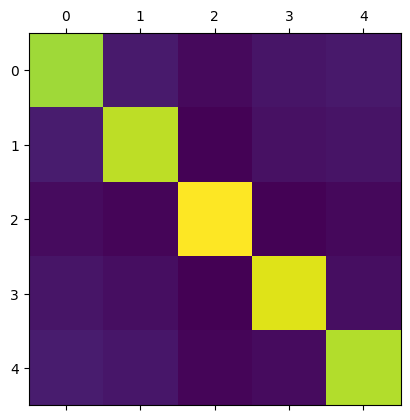

In [180]:
# --------------- Train --------------------
metrics.print(X, Y, classes, logNormal)

Classification Accuracy :  0.5938
F1 Score                :  [0.55580828 0.58142531 0.64570972 0.60869926 0.57806419]
Confusion Matrix        : 


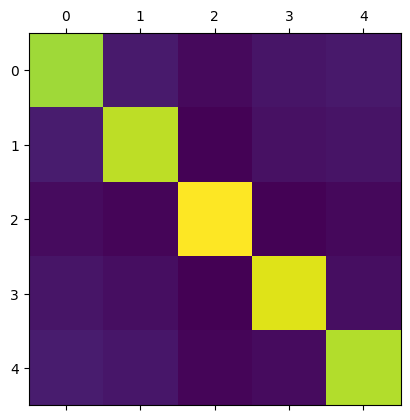

In [181]:
# --------------- Test --------------------
metrics.print(X_test, Y_test, classes, logNormal)

### Bayes' classifier with exponential distribution

Classification Accuracy :  0.20061666666666667
F1 Score                :  [0.28455516 0.05332337 0.22691824 0.01385902 0.24428515]
Confusion Matrix        : 


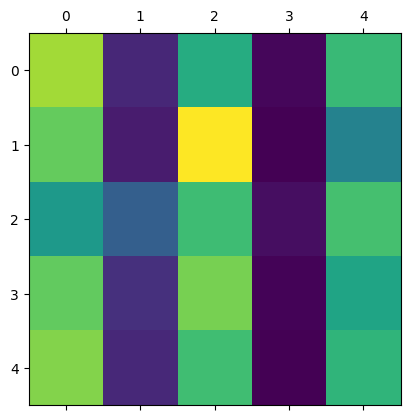

In [182]:
# --------------- Train --------------------
metrics.print(X, Y, classes, logExp)

Classification Accuracy :  0.20061666666666667
F1 Score                :  [0.28455516 0.05332337 0.22691824 0.01385902 0.24428515]
Confusion Matrix        : 


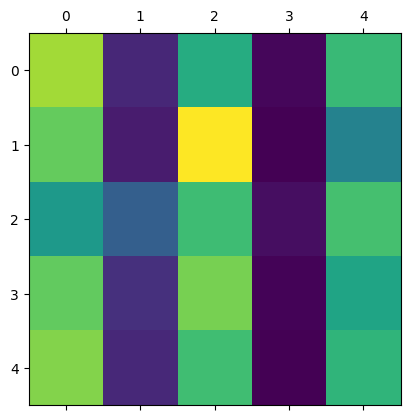

In [183]:
# --------------- Test --------------------
metrics.print(X_test, Y_test, classes, logExp)

# P4 (Multi-class classification)

In this problem, we consider an image dataset called Kannada-MNIST. This dataset contains images (60,000 images with 6000 per class) of digits from the south Indian language of Kannada. The task is to build a 10-class classifier for the digits. 

You are supposed to test the following classification schemes: 
- Naive Bayes’ with Normal as Class conditional
- Logistic regressor with gradient descent
- Multi-class Bayes’ classifier with GMMs with diagonal co-variances for class conditionals.

Report the following metrics on the test data: 
- Classification accuracy
- Confusion matrix
- Class-wise F1 score
- RoC curves for any pair of classes
- likelihood curve for EM with different choices for the number of mixtures as hyper-parameters
- Emipiral risk on the train and test data while using logistic regressor

In this problem, first split the data into train and test parts with the following ratios of **20:80**, **30:70**, **50:50**, **70:30**, and **90:10**, and record your observations. Train the algorithms on the train part and evaluate over the test part.

**DATA:** `images.zip`

In [188]:
%%capture
!unzip -n data/images.zip -d data

In [194]:
import os
from os.path import join
from PIL import Image

imageDir = "./data/images"

labels = os.listdir(imageDir)
data = []
for label in labels:
    data[label] = [np.array(Image.open(join(imageDir, label, image)) for image in os.listdir(join(imageDir, label)))]
# for id in labels['id']:
#   data[id] = np.array(Image.open(join(trainDir, str(id) + ".tif")).resize((shape["image"][1], shape["image"][0])), dtype="uint")

# fig, ax = plt.subplots(2, 8, figsize=(15, 5))
# for i in range(16):
#     index = findFirst(labels["label"], lambda x: x == i)
#     ax[i // 8][i % 8].imshow(data[index].astype(np.uint8), cmap='gray')
#     ax[i // 8][i % 8].set_title(classes[i])
#     ax[i // 8][i % 8].get_xaxis().set_visible(False)
#     ax[i // 8][i % 8].get_yaxis().set_visible(False)

# fig.tight_layout()
data

OSError: [Errno 24] Too many open files: './data/images/3/image_21133.png'

# P5 (Multi-class classification)

In this part, the data from the previous problem is ’condensed’ (using PCA) to **10 dimensions**. Repeat the above experiment with all the models and metrics and record your observations.

**DATA:** `KannadaMNISTPCA.csv`